## Repaso de validación cruzada y curvas ROC

Vamos a simular un dataset de dos clases. **Recuerden que las conclusiones que saquemos de este procedimiento son propias del problema.** ¡Manos a la obra! 


## A. Generar un dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, class_sep=0.5, weights=[0.90], flip_y=0, random_state=1)

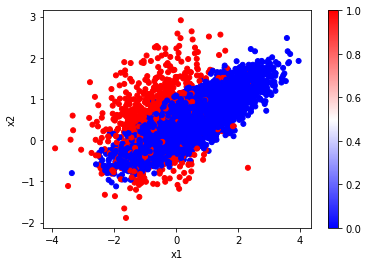

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Vamos a ver cuantas clases tenemos y en que proporción

In [4]:
np.unique(y)

array([0, 1])

/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


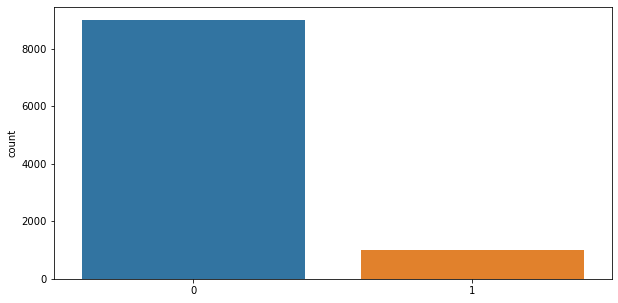

In [5]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y,label="Count")
plt.show()

4. Separar el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test,y_test) usando la función **train_test_split** de scikit-learn [recordar importarla primero!]

In [6]:
from sklearn.model_selection import train_test_split

X_dev, X_held, y_dev, y_held = train_test_split(pd.DataFrame(X), y, test_size=0.3, random_state=0)

In [7]:
X_dev.isnull().sum()

0    0
1    0
dtype: int64

## B. Preprocessing. 
Como vimos las veces que utilizamos el modelo KNN, es conveniente que los features estén normalizados(¿Por qué?). Nuestro dataset ya se encuentra normalizado. Sin embargo conviene recordar los pasos a seguir si trabajamos con otro dataset.  

0. Chequeá cuál es el mean y el std de X_train y X_test. 
1. Importá el StandardScaler. 
2. Cargar el StandardScaler.
3. Fittearlo con los datos de entrenamiento X_train (¿Por qué no con y_train?¿Por qué no con X_test? Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
4. Transformá las variables X_train e X_test con el StandatdScaler que entrenaste (¿Por qué no y_train e y_test?Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
5. Chequeá cuál es el mean y el std de las X_train y X_test transformadas. 


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_dev);

In [9]:
X_dev_scal = scaler.transform(X_dev)  
X_held_scal = scaler.transform(X_held)  

In [10]:
X_dev.isnull().sum()

0    0
1    0
dtype: int64

## C. KNN 
1. Importá el moelo de KNN de sklearn usando la siguiente linea: *from sklearn.neighbors import KNeighborsClassifier* 
2. Cuando cargamos el algoritmo, tenemos que indicarle los hiperparámetros que queremos utilizar. La distancia, por default, es la euclideana. Cargá el modelo utilizando 5 vecinos. 


In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors =n_neighbors )

3. Fiteá el modelo utilizando los datos de entrenamiento escaleados. 
4. Calculá el Accuracy DE ENTRENAMIENTO [importar funciones necesarias]
5. Calculá el Accuracy DE TEST.
6. ¿Conclusiones?

In [13]:
clf.fit(X_dev_scal,y_dev)

KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score

y_dev_pred = clf.predict(X_dev_scal)
train_acc = accuracy_score(y_dev, y_dev_pred)
print(round(train_acc,2))

0.94


In [15]:
y_held_pred = clf.predict(X_held_scal)
test_acc = accuracy_score(y_held, y_held_pred)                                                       
print(round(test_acc,2))

0.94


7- En lugar de cálcular el score directamente vamos a hacer cross-validación

In [16]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_dev_scal,y_dev)
y_dev_pred = clf.predict(X_dev_scal)
scores = cross_val_score(clf,X_dev_scal, y_dev,cv= 10, scoring='accuracy')

In [17]:
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

Accuracy para KNN: 0.92 (+/- 0.01)


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_dev, y_dev_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6273
           1       0.86      0.46      0.60       727

    accuracy                           0.94      7000
   macro avg       0.90      0.73      0.78      7000
weighted avg       0.93      0.94      0.93      7000



In [19]:
y_held_pred = clf.predict(X_held_scal)
print(classification_report(y_held, y_held_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2728
           1       0.80      0.41      0.54       272

    accuracy                           0.94      3000
   macro avg       0.87      0.70      0.75      3000
weighted avg       0.93      0.94      0.93      3000



8.Para poder determinar el hiperparámetro K, es útil trazar la curva de complejidad. Corré las lineas a continuación e interpretá la curva. 

In [20]:
from sklearn.model_selection import validation_curve
param_range= np.linspace(1, 10,dtype=int)

train_scores, test_scores = validation_curve(
    clf, X_dev_scal, y_dev, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", cv=5,n_jobs=1)

In [21]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

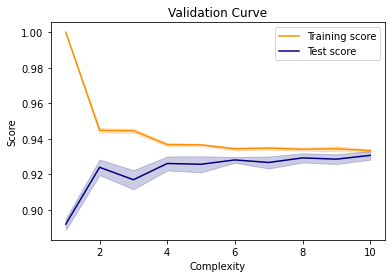

In [22]:
# Plot learning curve
plt.figure()
plt.title("Validation Curve")
plt.xlabel("Complexity")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
#plt.xlim(0, 100)
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(param_range, test_scores_mean, label="Test score",
             color="navy")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")

## Ahora vamos a calcular la curva ROC

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [24]:
y_score = clf.predict_proba(X_dev_scal)

In [25]:
y_score

array([[1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [26]:
np.unique(y_dev)

array([0, 1])

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_dev, y_score[:,1])

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend()

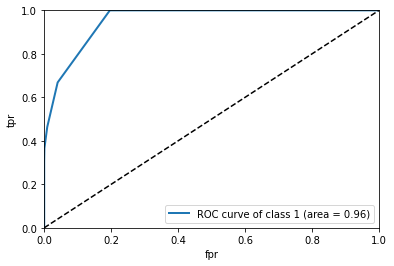

In [29]:
roc_auc= auc(fpr, tpr)   
plot_roc_curve(fpr, tpr,label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(1, roc_auc))
plt.show()